In [1]:
from c19analysis import *
import cpnCommonlib as cpn
cpn.setup_figures(plt)

In [2]:
today = pd.to_datetime('11/4/2020')
path = '../'
filename = 'us-counties.csv'
fnamesta = 'us-states.csv'
data=pd.read_csv(path+filename,error_bad_lines=False)
data_st=pd.read_csv(path+fnamesta,error_bad_lines=False)
data['date']=pd.to_datetime(data['date'])
data_st['date']=pd.to_datetime(data_st['date'])
    

## Total number of cases by state

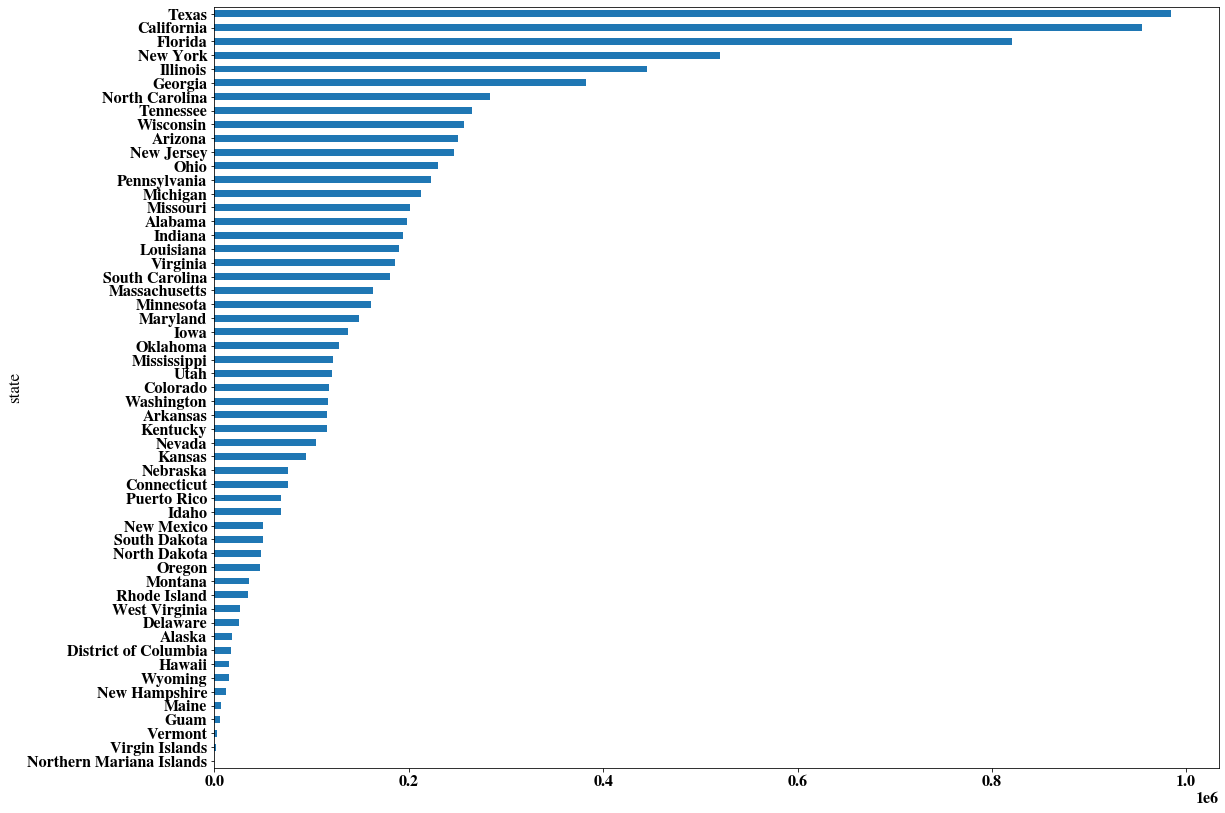

In [3]:
byst_cases=data_st.groupby('date').get_group(today.strftime("%Y-%m-%d")).groupby('state').cases.sum().sort_values()
fig4,ax4=plt.subplots(figsize=(18,14))
byst_cases.plot(kind="barh", ax=ax4)

In [4]:
byst_cases

state
Northern Mariana Islands        96
Virgin Islands                1388
Vermont                       2267
Guam                          5872
Maine                         7077
New Hampshire                11563
Wyoming                      15044
Hawaii                       15591
District of Columbia         17601
Alaska                       17750
Delaware                     25534
West Virginia                25987
Rhode Island                 35122
Montana                      36012
Oregon                       47049
North Dakota                 48306
South Dakota                 49791
New Mexico                   50251
Idaho                        68791
Puerto Rico                  69020
Connecticut                  75373
Nebraska                     75888
Kansas                       93967
Nevada                      104514
Kentucky                    115426
Arkansas                    115812
Washington                  117091
Colorado                    118356
Utah          

<ipython-input-5-b14f9619b643>:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax4.set_xlim(0,4e7)


2020-11-04containment_test.png SAVED.


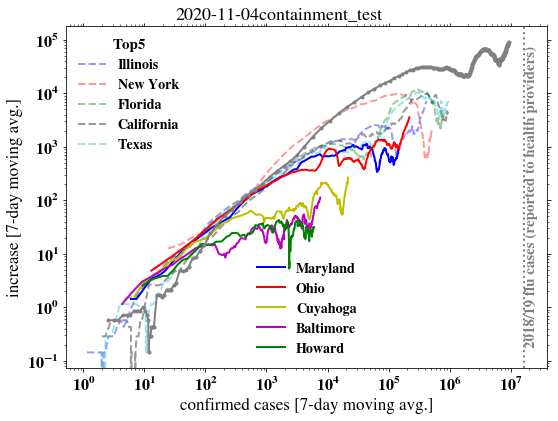

In [5]:
cpn.setup_figures(plt)
top5 = byst_cases.keys()[-5:]
fig4,ax4 = plt.subplots(figsize=(8,6))
fig4_ttl = str(today.date())+"containment_test"
clrs=['b','r','g','k','c']
lgc = [];tag=[]
for sts in np.arange(top5.size):
    l,tg = confirmed_cases_vs_increase_state(data_st,top5[sts],fig4,ax4,clr=clrs[sts],alpha=0.4,lns='--',moving_window=7)
    lgc.append(l)
    tag.append(tg)
    
lg=ax4.legend(lgc,tag,loc='upper left',title='Top5')
l1=confirmed_cases_vs_increase_state(data_st,'Maryland',fig4,ax4,clr='b',lns='-',moving_window=7)
l2=confirmed_cases_vs_increase_state(data_st,'Ohio',fig4,ax4,clr='r',lns='-',moving_window=7)
l3=confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig4,ax4,clr='y',lns='-',moving_window=7)
l4=confirmed_cases_vs_increase(data,'Baltimore',39153,fig4,ax4,clr='m',lns='-',moving_window=7)
l5=confirmed_cases_vs_increase(data,'Howard',24027,fig4,ax4,clr='g',lns='-',moving_window=7)
l6=confirmed_cases_vs_increase_US(data_st,ax4,moving_window=7)
ax4.axvline(16.5e6,ls=':',color='grey')
ax4.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,0.2),color='grey',rotation=90)
ax4.set_xlim(0,4e7)
ax4.set_xlabel('confirmed cases [7-day moving avg.]')
ax4.set_ylabel('increase [7-day moving avg.]')
ax4.legend([l[0] for l in [l1,l2,l3,l4,l5]],[l[1] for l in [l1,l2,l3,l4,l5]],loc='lower center')
ax4.add_artist(lg)
fig4.suptitle(fig4_ttl)
cpn.rightNtop_ticks(ax4)
fig4.tight_layout(rect=[0,0,1,0.98])
#fig4.show()
savefig(fig4,fig4_ttl)
#savefig(fig4,'Top-5')

## Ohio

<ipython-input-6-6d30bd4398de>:16: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax3.set_xlim(0,4e7)


2020-11-04_containment_test_Ohio_7day.png SAVED.


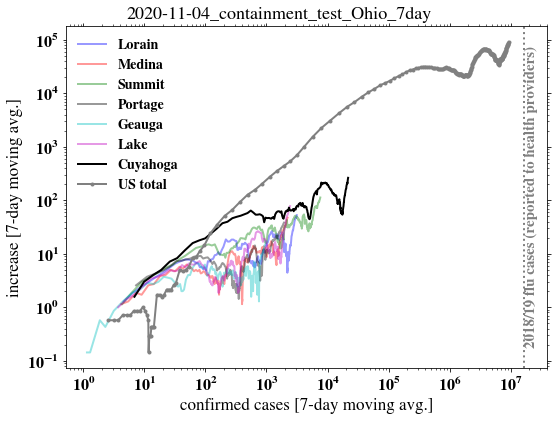

In [6]:
OH_sur = {'Lorain':39093,'Medina':39103,'Summit':39153,'Portage':39133,'Geauga':39055,'Lake':39085}
clrs=['b','r','g','k','c','m']
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_Ohio_7day'
i=0
for cts in OH_sur.keys():
    confirmed_cases_vs_increase(data,cts,OH_sur[cts],fig3,ax3,clr=clrs[i],alpha=0.4,lns='-',moving_window=7)
    i+=1

confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig3,ax3,clr='k',lns='-',moving_window=7)
confirmed_cases_vs_increase_US(data_st,ax3,moving_window=7)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,0.2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [7-day moving avg.]')
ax3.set_ylabel('increase [7-day moving avg.]')
ax3.set_xlim(0,4e7)
cpn.rightNtop_ticks(ax3)
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
savefig(fig3,fig3_ttl)

In [38]:
OH_sur.keys()

dict_keys(['Lorain', 'Medina', 'Summit', 'Portage', 'Geauga', 'Lake'])

## Maryland

<ipython-input-8-e3041c46a830>:16: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax3.set_xlim(0,4e7)


Replace existing file?:  y


2020-11-04_containment_test_MD_7day.png SAVED.


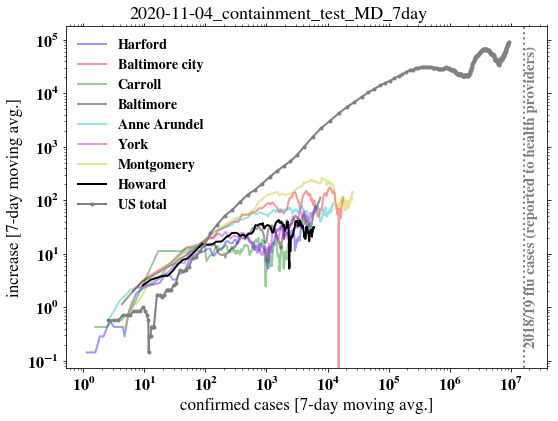

In [8]:
MD_sur ={'Harford':24025,'Baltimore city':24510,	'Carroll':24013,'Baltimore':39153,'Anne Arundel':24003,'York':42133,'Montgomery':24031} #York in PA
clrs=['b','r','g','k','c','m','y']
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_MD_7day'
i=0
for cts in MD_sur.keys():
    confirmed_cases_vs_increase(data,cts,MD_sur[cts],fig3,ax3,clr=clrs[i],alpha=0.4,lns='-',moving_window=7)
    i+=1

confirmed_cases_vs_increase(data,'Howard',24027,fig3,ax3,clr='k',lns='-',moving_window=7)
confirmed_cases_vs_increase_US(data_st,ax3,moving_window=7)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,0.2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [7-day moving avg.]')
ax3.set_ylabel('increase [7-day moving avg.]')
ax3.set_xlim(0,4e7)
cpn.rightNtop_ticks(ax3)
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
savefig(fig3,fig3_ttl)